In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

In [90]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

inter = interp1d

In [4]:
u_filter = pd.read_csv("SLOAN_SDSS_u.dat", header=None, delimiter=" ")

In [16]:
u_filter.describe()

,0,1
count,47.00000,47.000000
mean,3555.00000,0.051564
std,342.78273,0.042291
min,2980.00000,0.000000
25%,3267.50000,0.004700
50%,3555.00000,0.054900
75%,3842.50000,0.093800
max,4130.00000,0.108500


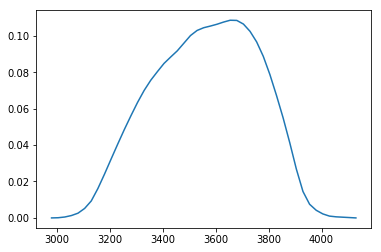

In [15]:
plt.figure()
plt.plot(u_filter[0], u_filter[1])
plt.show()

In [18]:
sample = u_filter.loc[:5,:]

In [19]:
sample

,0,1
0,2980.0,0.0000
1,3005.0,0.0001
2,3030.0,0.0005
3,3055.0,0.0013
4,3080.0,0.0026
5,3105.0,0.0052


In [22]:
f = interp1d(u_filter[0], u_filter[1])

In [27]:
x = np.linspace(3000, 4000, num=41, endpoint=True)

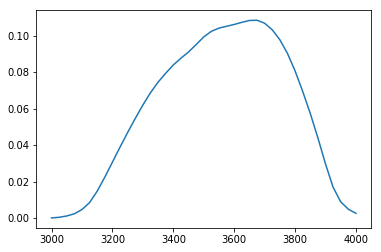

In [36]:
plt.plot(x, f(x))

In [97]:
y = f(3081)
y

array(0.002704)

In [42]:
spectra_1 = pd.read_csv("1.csv", header=None, skiprows=[0], usecols=[0,1])

In [43]:
spectra_1

,0,1
0,9172.062160,5.370380e-15
1,9168.496475,2.642023e-14
2,9164.931687,3.503685e-14
3,9161.367795,2.001948e-14
4,9157.804796,3.073098e-14
5,9154.242690,2.954094e-14
6,9150.681474,1.420026e-14
7,9147.121146,6.486229e-15
8,9143.561706,2.644843e-14
9,9140.003151,2.677323e-14


In [56]:
u_range = spectra_1[spectra_1[0] < 4130.00000]

In [57]:
u_range.describe()

,0,1
count,378.000000,3.780000e+02
mean,3641.097891,2.965018e-16
std,273.711471,6.789779e-15
min,3188.062706,-5.976212e-14
25%,3402.329767,4.252222e-16
50%,3632.101991,8.106686e-16
75%,3875.275430,1.298077e-15
max,4129.929749,3.065493e-14


In [62]:
u_range.head(1)

,0,1
1582,4129.929749,1.334206e-15


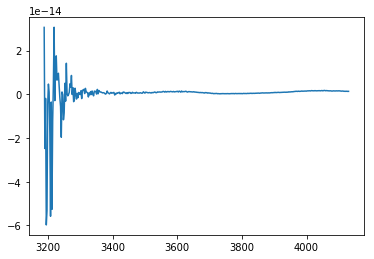

In [58]:
plt.plot(u_range[0], u_range[1])

In [61]:
u_range.iloc[0,0]

4129.9297489999999

In [108]:
def scale_filter(val, filter_df):
    fac = filter_df[filter_df[0] == val]
    if len(fac) is 0:
        print "guessing"
        f = inter(filter_df[0], filter_df[1])
        return f(val)
    else:
        return fac[1]

In [68]:
len(u_range[u_range[0] == 4129.929749])

1

In [70]:
z = u_range[u_range[0] == 4129.929749]

In [71]:
z[1]

1582    1.334206e-15
Name: 1, dtype: float64

In [102]:
scale_filter(3106.0, u_filter)

guessing


array(0.005364)

In [84]:
u_range[u_range[0] == 3192.433113]

,0,1
1957,3192.433113,-1.906191e-15


In [118]:
scale_filter(3106.0, u_filter) * spectra_1[spectra_1[0] == 3218.822397][1]

guessing


1945    1.644330e-16
Name: 1, dtype: float64

In [119]:
u_scale_filter = lambda val: scale_filter(val, u_filter)

In [120]:
u_scale_filter(3106)

guessing


array(0.005364)